In [30]:
import requests
import pandas as pd
offset = 0
def add_restaurants(query):
    results = {'ID': [],'Name': [], 'Reviews': [],'Categories': [],'Rating': [], 'Coordinates': [], 'Price': [], 'Location': [],'Phone_Number': [], 'Hours': []}
    for q in query:
        results['ID'].append(q['id'])
        results['Name'].append(q['name'])
        results['Reviews'].append(q['review_count'])
        results['Categories'].append(q['categories'])
        try:
            results['Rating'].append(q['rating'])
        except:
            results['Rating'].append(None)
        results['Coordinates'].append(q['coordinates'])
        try:
            results['Price'].append(q['price'])
        except:
            results['Price'].append(None)
        results['Location'].append(q['location'])
        results['Phone_Number'].append(q['phone'])
        results['Hours'].append(q['business_hours'])
    return pd.DataFrame(results)
def clean_columns(dataframe):
    df = dataframe
    df['Categories'] = df['Categories'].apply(lambda x: [category['title'] for category in x])
    df['Latitude'] = df['Coordinates'].apply(lambda x: x['latitude'])
    df['Longitude'] = df['Coordinates'].apply(lambda x: x['longitude'])
    df['Street'] = df['Location'].apply(lambda x: x['address1'])
    df['City'] = df['Location'].apply(lambda x: x['city'])
    df['Zip_code'] = df['Location'].apply(lambda x: x['zip_code'])
    df['Country'] = df['Location'].apply(lambda x: x['country'])
    df['State'] = df['Location'].apply(lambda x: x['state'])
    df = df.assign(category=df['Categories'].str.split(', ')).explode('Categories')
    df = df.drop(columns=['category'])
    return df
def API_call(main_df):
    global offset
    url = 'https://api.yelp.com/v3/businesses/search'
    key = 'T9ZNtvf1zp_0iShfjFRrieHw4T_u7hPXosPrb5H2ynVM-DZblw-Nn8SY7-ybSGs_1fta7wlohfJQjrPa9ocUTFttbvfs42V5ed-j86OwoZXh-yI9qY_OuJezQujpZnYx'
    headers = {'Authorization':'Bearer %s' % key}
    parameters = {'location':'Orlando, FL','term':'restaurant','limit':50,'offset':offset}
    response = requests.get(url,headers=headers,params=parameters)
    query = response.json()['businesses']
    
    new_df = add_restaurants(query)
    new_df = clean_columns(new_df)
    merged_df = pd.concat([main_df, new_df]).drop_duplicates(subset=['ID','Categories'], keep='first')
    offset += 50 
    return merged_df

df = pd.DataFrame()
df = API_call(df)
df = API_call(df)

In [56]:
df.info() 
df.describe() 
print(df.head()) 

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 0 to 49
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            236 non-null    object 
 1   Name          236 non-null    object 
 2   Reviews       236 non-null    int64  
 3   Categories    236 non-null    object 
 4   Rating        236 non-null    float64
 5   Coordinates   236 non-null    object 
 6   Price         181 non-null    float64
 7   Location      236 non-null    object 
 8   Phone_Number  236 non-null    object 
 9   Hours         236 non-null    object 
 10  Latitude      236 non-null    float64
 11  Longitude     236 non-null    float64
 12  Street        233 non-null    object 
 13  City          236 non-null    object 
 14  Zip_code      236 non-null    object 
 15  Country       236 non-null    object 
 16  State         236 non-null    object 
dtypes: float64(4), int64(1), object(12)
memory usage: 22.1+ KB
                    

In [38]:
df['Rating'].unique() 

array([4.5, 4.1, 4.4, 4.7, 5. , 4.2, 4.3, 4.9, 4.6, 4.8, 4. , 3.8, 3.3,
       3.7, 3.9, 2.2, 3.1])

In [39]:
df['Categories'].unique() 

array(['New American', 'Cocktail Bars', 'Venues & Event Spaces',
       'Seafood', 'American', 'Breakfast & Brunch', 'Southern',
       'Chicken Wings', 'Bars', 'Tapas Bars', 'Japanese', 'Noodles',
       'Indian', 'German', 'Modern European', 'Haitian', 'Comfort Food',
       'Beer Bar', 'Barbeque', 'Soul Food', 'Pizza', 'Italian',
       'Tapas/Small Plates', 'Pubs', 'Sports Bars', 'Tacos', 'Peruvian',
       'Colombian', 'Empanadas', 'Turkish', 'Halal', 'Mediterranean',
       'Filipino', 'Sandwiches', 'Latin American', 'Pan Asian', 'Chinese',
       'Chicken Shop', 'Hawaiian', 'Juice Bars & Smoothies', 'Salad',
       'Acai Bowls', 'Mexican', 'Sushi Bars', 'Whiskey Bars',
       'Cajun/Creole', 'Cafes', 'Diners', 'Steakhouses', 'Burgers',
       'Brazilian', 'French', 'Vietnamese', 'Hot Dogs', 'Wine Bars',
       'Food Trucks', 'Caterers', 'Izakaya', 'Seafood Markets',
       'Szechuan', 'Thai', 'Lounges', 'Dim Sum', 'Middle Eastern',
       'Wraps', 'Asian Fusion', 'Soup', 'Music 

In [40]:
df['Price'].unique() 

array(['$$', None, '$$$', '$$$$', '$'], dtype=object)

In [42]:
df['Zip_code'].unique() 

array(['32806', '32801', '32809', '32803', '32839', '32837', '32819',
       '32825', '32808', '32822', '32811', '32814', '32789', '32821',
       '32804', '32832'], dtype=object)

In [41]:
df.isnull().sum()

ID               0
Name             0
Reviews          0
Categories       0
Rating           0
Coordinates      0
Price           55
Location         0
Phone_Number     0
Hours            0
Latitude         0
Longitude        0
Street           3
City             0
Zip_code         0
Country          0
State            0
dtype: int64

In [45]:
df['Categories'] = df['Categories'].str.capitalize()

In [48]:
df.drop_duplicates(subset=['ID', 'Categories'], keep='first', inplace=True)

In [50]:
import matplotlib

<AxesSubplot:>

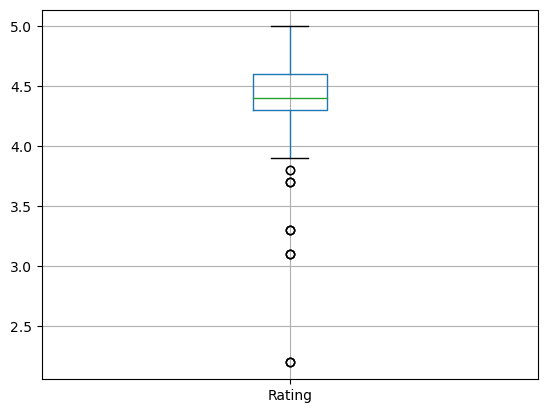

In [51]:
df.boxplot(column=['Rating'])

In [53]:
df['Rating'] = df['Rating'].astype(float)

In [54]:
price_map = {'$': 1, '$$': 2, '$$$': 3, '$$$$': 4}
df['Price'] = df['Price'].map(price_map)

In [55]:
df['Price'].unique() 

array([ 2., nan,  3.,  4.,  1.])

In [57]:
df.info() 
df.describe() 
print(df.head()) 

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 0 to 49
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            236 non-null    object 
 1   Name          236 non-null    object 
 2   Reviews       236 non-null    int64  
 3   Categories    236 non-null    object 
 4   Rating        236 non-null    float64
 5   Coordinates   236 non-null    object 
 6   Price         181 non-null    float64
 7   Location      236 non-null    object 
 8   Phone_Number  236 non-null    object 
 9   Hours         236 non-null    object 
 10  Latitude      236 non-null    float64
 11  Longitude     236 non-null    float64
 12  Street        233 non-null    object 
 13  City          236 non-null    object 
 14  Zip_code      236 non-null    object 
 15  Country       236 non-null    object 
 16  State         236 non-null    object 
dtypes: float64(4), int64(1), object(12)
memory usage: 22.1+ KB
                    

In [59]:
df['Price'].fillna(df['Price'].median(), inplace=True)

In [60]:
df.isnull().sum()

ID              0
Name            0
Reviews         0
Categories      0
Rating          0
Coordinates     0
Price           0
Location        0
Phone_Number    0
Hours           0
Latitude        0
Longitude       0
Street          3
City            0
Zip_code        0
Country         0
State           0
dtype: int64

In [61]:
df['Price'] = df['Price'].astype(int)

In [64]:
df['Street'] = df['Street'].fillna('Unknown')

In [65]:
df.isnull().sum()

ID              0
Name            0
Reviews         0
Categories      0
Rating          0
Coordinates     0
Price           0
Location        0
Phone_Number    0
Hours           0
Latitude        0
Longitude       0
Street          0
City            0
Zip_code        0
Country         0
State           0
dtype: int64